# || The Sparks Foundation || GRIPJUNE21
## Name: **Pavan Dhake**

# **Traffic Sign Classification and Recognition System**
### *Task 5 : Implement a real time traffic sign classifier which identifies the traffic sign and gives an alert.*

### In this project we are detecting German Traffic signs using keras (Deep Learning) library.
#### Here we used German Traffic Signs pickle file dataset.
#### [German Traffic Signs pickle file dataset link](https://bitbucket.org/jadslim/german-traffic-signs/src/master/)

In [1]:
# download dataset repository
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [2]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [3]:
# importing libaries
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pickle
import pandas as pd
import random
import cv2

In [4]:
np.random.seed(0)

In [5]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# import pickle dataset file
with open('german-traffic-signs/train.p', 'rb') as f:
  train_data = pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb') as f:
  val_data = pickle.load(f)
with open('german-traffic-signs/test.p', 'rb') as f:
  test_data = pickle.load(f)
  
X_train , y_train = train_data['features'], train_data['labels']
X_val , y_val = val_data['features'], val_data['labels']
X_test , y_test = test_data['features'], test_data['labels']

In [7]:
print("X_train shape = ",X_train.shape)
print("X_val shape = ",X_val.shape)
print("X_test shape = ",X_test.shape)

X_train shape =  (34799, 32, 32, 3)
X_val shape =  (4410, 32, 32, 3)
X_test shape =  (12630, 32, 32, 3)


In [8]:
assert(X_train.shape[0] == y_train.shape[0]), "No. of Images is not equals to number of labels"
assert(X_val.shape[0] == y_val.shape[0]), "No. of Images is not equals to number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "No. of Images is not equals to number of labels"

assert(X_train.shape[1:] == (32,32,3)), "The Dimesnsions of the images are not 32 x 32 x 3"
assert(X_val.shape[1:] == (32,32,3)), "The Dimesnsions of the images are not 32 x 32 x 3"
assert(X_test.shape[1:] == (32,32,3)), "The Dimesnsions of the images are not 32 x 32 x 3"

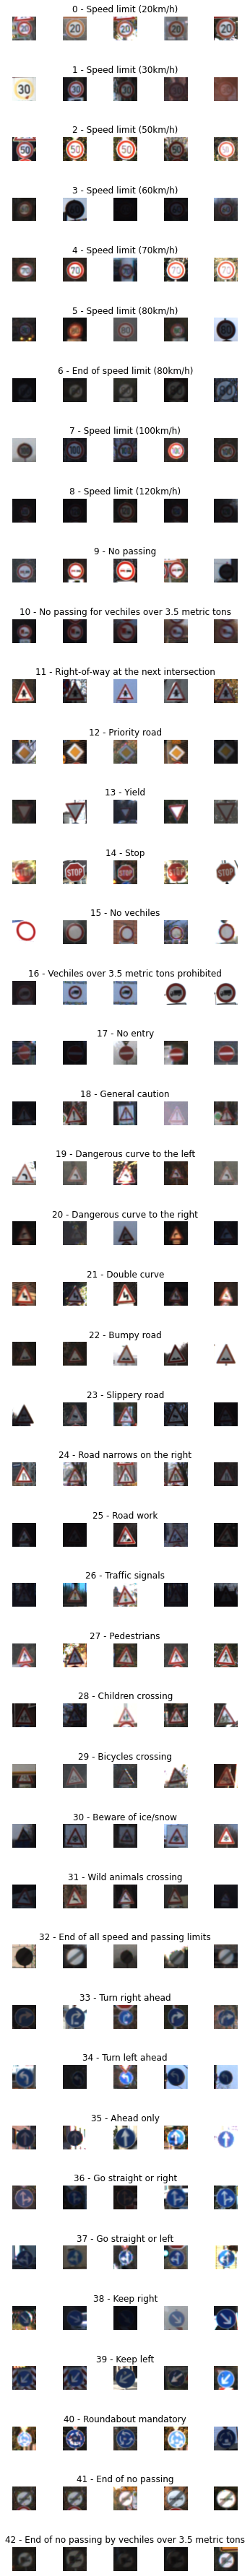

In [9]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
#print(data)

num_of_samples=[]

cols = 5
num_classes = 43

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
fig.tight_layout()

for i in range(cols):
    for j, row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
        axs[j][i].axis("off")
        if i == 2:
          axs[j][i].set_title(str(j) + " - " + row["SignName"])
          num_of_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


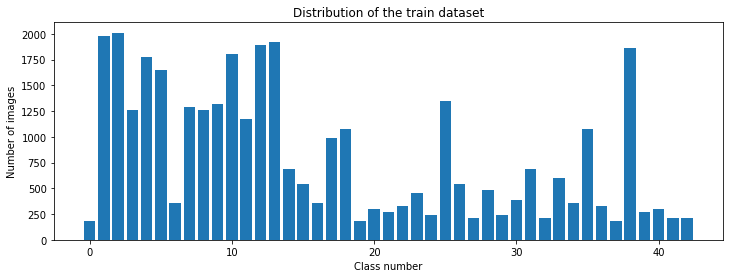

In [10]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

(32, 32, 3)
1


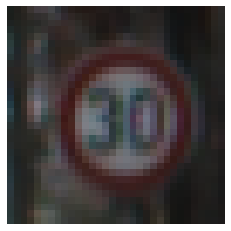

In [11]:
Test = 2323
plt.imshow(X_train[Test])
plt.axis("off")
print(X_train[Test].shape)
print(y_train[Test])

(32, 32)


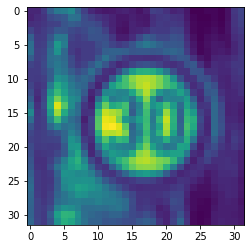

In [12]:
def grayscale(img):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  return img

img = grayscale(X_train[Test])
plt.imshow(img)
#plt.axis("off")
print(img.shape)

(32, 32)


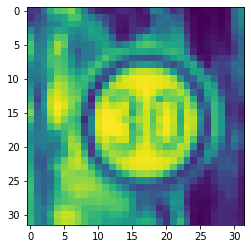

In [13]:
def equalize(img):
  img = cv2.equalizeHist(img)
  return img


img = equalize(img)
plt.imshow(img)
print(img.shape)

In [14]:
def preprocessing(img):
  img = grayscale(img)
  img = equalize(img)
  #normalize the images, i.e. convert the pixel values to fit btwn 0 and 1
  img = img/255
  return img

In [15]:
X_train = np.array(list(map(preprocessing, X_train)))
X_val = np.array(list(map(preprocessing, X_val)))
X_test = np.array(list(map(preprocessing, X_test)))

(34799, 32, 32)


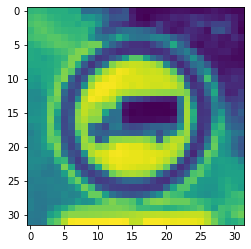

In [16]:
plt.imshow(X_train[random.randint(0, len(X_train) - 1)])
print(X_train.shape)

In [17]:
X_train = X_train.reshape(34799, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)

In [18]:
from keras.preprocessing.image import ImageDataGenerator

# data Aug
datagen = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10.)

datagen.fit(X_train)

(15, 32, 32, 1)


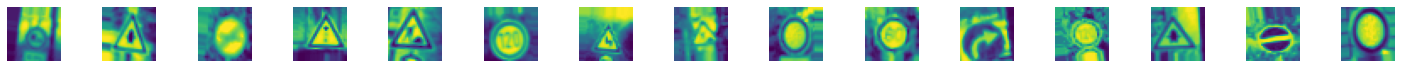

In [19]:
batches = datagen.flow(X_train, y_train, batch_size = 15)
X_batch, y_batch = next(batches)

fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()

for i in range(15):
    axs[i].imshow(X_batch[i].reshape(32, 32))
    axs[i].axis("off")

print(X_batch.shape)

In [20]:
print("X_train shape = ",X_train.shape)
print("X_val shape = ",X_val.shape)
print("X_test shape = ",X_test.shape)

X_train shape =  (34799, 32, 32, 1)
X_val shape =  (4410, 32, 32, 1)
X_test shape =  (12630, 32, 32, 1)


In [21]:
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)
y_test = to_categorical(y_test, 43)

In [22]:
def better_model():
  model = Sequential()

  model.add(Conv2D(60,(5,5), input_shape= (32,32,1), activation = 'relu'))
  model.add(Conv2D(60,(5,5), input_shape= (32,32,1), activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Conv2D(30, (3, 3) , activation = 'relu'))
  model.add(Conv2D(30, (3, 3) , activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  
  model.add(Flatten())
  model.add(Dense(500, activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation = 'softmax'))
  
  #Compile Model  
  model.compile(Adam(lr = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
  
  return model

In [23]:
model = better_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
flatten (Flatten)            (None, 480)               0

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [24]:
batch_size=100
steps_per_epoch = X_train.shape[0]//batch_size

In [25]:
# define our training paramters
history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                            steps_per_epoch=steps_per_epoch,
                            epochs=5,
                            validation_data=(X_val, y_val), shuffle = 1)

Epoch 1/5
347/347 [==============================] - 27s 35ms/step - loss: 2.8966 - accuracy: 0.2170 - val_loss: 0.5278 - val_accuracy: 0.8351
Epoch 2/5
347/347 [==============================] - 11s 32ms/step - loss: 0.8992 - accuracy: 0.7206 - val_loss: 0.1951 - val_accuracy: 0.9413
Epoch 3/5
347/347 [==============================] - 12s 34ms/step - loss: 0.5312 - accuracy: 0.8345 - val_loss: 0.1318 - val_accuracy: 0.9578
Epoch 4/5
347/347 [==============================] - 12s 33ms/step - loss: 0.3529 - accuracy: 0.8905 - val_loss: 0.0867 - val_accuracy: 0.9730
Epoch 5/5
347/347 [==============================] - 11s 33ms/step - loss: 0.2782 - accuracy: 0.9153 - val_loss: 0.0938 - val_accuracy: 0.9719


Text(0.5, 0, 'epoch')

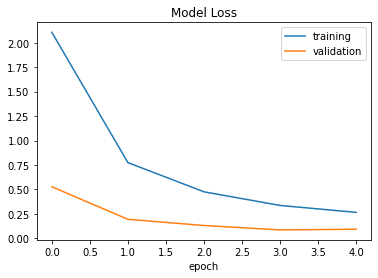

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Model Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

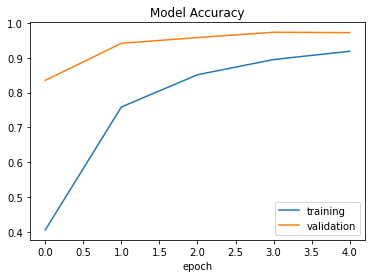

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Model Accuracy')
plt.xlabel('epoch')

In [30]:
score = model.evaluate(X_test, y_test , verbose = 0)
print("The test score is: ",score[0])
print("The Accuracy score is: ",score[1])

The test score is:  0.16339483857154846
The Accuracy score is:  0.9540776014328003


In [31]:
#save model
model.save("traffic model.h5")

In [32]:
'''ClassId,SignName
0,Speed limit (20km/h)
1,Speed limit (30km/h)
2,Speed limit (50km/h)
3,Speed limit (60km/h)
4,Speed limit (70km/h)
5,Speed limit (80km/h)
6,End of speed limit (80km/h)
7,Speed limit (100km/h)
8,Speed limit (120km/h)
9,No passing
10,No passing for vehicles over 3.5 metric tons
11,Right-of-way at the next intersection
12,Priority road
13,Yield
14,Stop
15,No vehicles
16,Vehicles over 3.5 metric tons prohibited
17,No entry
18,General caution
19,Dangerous curve to the left
20,Dangerous curve to the right
21,Double curve
22,Bumpy road
23,Slippery road
24,Road narrows on the right
25,Road work
26,Traffic signals
27,Pedestrians
28,Children crossing
29,Bicycles crossing
30,Beware of ice/snow
31,Wild animals crossing
32,End of all speed and passing limits
33,Turn right ahead
34,Turn left ahead
35,Ahead only
36,Go straight or right
37,Go straight or left
38,Keep right
39,Keep left
40,Roundabout mandatory
41,End of no passing
42,End of no passing by vehicles over 3.5 metric tons'''

'ClassId,SignName\n0,Speed limit (20km/h)\n1,Speed limit (30km/h)\n2,Speed limit (50km/h)\n3,Speed limit (60km/h)\n4,Speed limit (70km/h)\n5,Speed limit (80km/h)\n6,End of speed limit (80km/h)\n7,Speed limit (100km/h)\n8,Speed limit (120km/h)\n9,No passing\n10,No passing for vehicles over 3.5 metric tons\n11,Right-of-way at the next intersection\n12,Priority road\n13,Yield\n14,Stop\n15,No vehicles\n16,Vehicles over 3.5 metric tons prohibited\n17,No entry\n18,General caution\n19,Dangerous curve to the left\n20,Dangerous curve to the right\n21,Double curve\n22,Bumpy road\n23,Slippery road\n24,Road narrows on the right\n25,Road work\n26,Traffic signals\n27,Pedestrians\n28,Children crossing\n29,Bicycles crossing\n30,Beware of ice/snow\n31,Wild animals crossing\n32,End of all speed and passing limits\n33,Turn right ahead\n34,Turn left ahead\n35,Ahead only\n36,Go straight or right\n37,Go straight or left\n38,Keep right\n39,Keep left\n40,Roundabout mandatory\n41,End of no passing\n42,End of n

# Testing

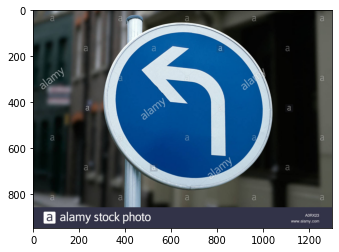

In [33]:
#fetch image
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)


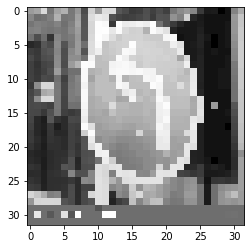

In [34]:
#Preprocess image
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [35]:
#Reshape reshape
img = img.reshape(1, 32, 32, 1)
print("The Predicted Sign: "+str(np.argmax(model.predict(img), axis=-1)))

The Predicted Sign: [38]


In [36]:
from keras.models import load_model
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
del model # deletes the existing model

In [37]:
# returns a compiled model
model = load_model('my_model.h5')

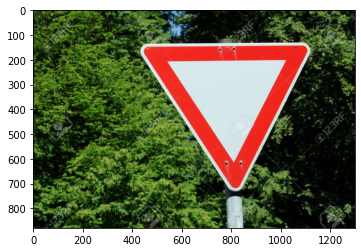

In [38]:
#Testing the Saved Model
#fetch image
import requests
from PIL import Image
url = 'https://previews.123rf.com/images/pejo/pejo0907/pejo090700003/5155701-german-traffic-sign-no-205-give-way.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)


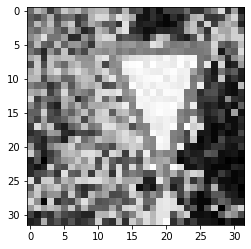

In [39]:
#Preprocess image
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [40]:
#Reshape reshape
img = img.reshape(1, 32, 32, 1)
print("The Predicted Sign: "+str(np.argmax(model.predict(img), axis=-1)))

The Predicted Sign: [13]


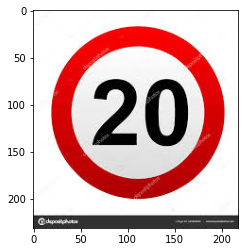

In [41]:
#Testing the Saved Model

#fetch image
import requests
from PIL import Image
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQAsQqZfuSKrMLh0u1TS2hplSnqG1UFgLjuIg&usqp=CAU'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)


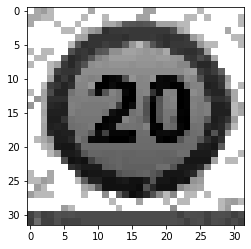

In [42]:
#Preprocess image
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [43]:
#Reshape reshape
img = img.reshape(1, 32, 32, 1)
print("The Predicted Sign: "+str(np.argmax(model.predict(img), axis=-1)))

The Predicted Sign: [0]


# ***Thank You***